In [33]:
from typing import Dict, List, Union, Tuple, NamedTuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import cv2
from PIL import Image, ImageDraw

In [35]:
import pathlib
from config import CONFIG

In [3]:
import sys
sys.path.insert(1, str(CONFIG.src))

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from alignment_test import alignImages

In [30]:
columns = ["box_name", "x", "y", "w", "h", "image_name", "image_width", "image_height", "stop_words"]
df = pd.read_csv(CONFIG.data / "annotations" / "final_project.csv", header=None)
df.columns = columns
df.head()

,box_name,x,y,w,h,image_name,image_width,image_height,stop_words
0,first name and middle initial and last name,171,64,784,110,f1040--1988-page-001.jpg,1165,1531,"Your first name and initial(if joint return, a..."
1,Home Address,159,128,778,91,f1040--1988-page-001.jpg,1165,1531,"Prsent home address(number, street, and apt. n..."
2,City,162,171,769,101,f1040--1988-page-001.jpg,1165,1531,"City, town or post office, state, and ZIP code"
3,Social Security Number,851,67,314,104,f1040--1988-page-001.jpg,1165,1531,Your social security number
4,Filling Status - Single,201,268,162,64,f1040--1988-page-001.jpg,1165,1531,Single


In [32]:
list_of_files = list(df.image_name.unique())
idx_to_file = {idx: file_name for idx, file_name in enumerate(list_of_files)}
idx_to_file

{0: 'f1040--1988-page-001.jpg',
 1: 'f1040--1988-page-002.jpg',
 2: 'f2106--1988-page-001.jpg',
 3: 'f2106--1988-page-002.jpg',
 4: 'f2441--1988-page-001.jpg',
 5: 'f1040sc--1988-page-001.jpg',
 6: 'f4562--1988-page-001.jpg',
 7: 'f4562--1988-page-002.jpg',
 8: 'f6251--1988-page-001.jpg',
 9: 'f1040sd--1988-page-001.jpg'}

In [34]:
type(CONFIG.data)

pathlib.WindowsPath

In [39]:
pd.read_csv(file_path, header=None).head(3)

,0,1,2,3,4,5,6,7,8
0,first name and middle initial and last name,171,64,784,110,f1040--1988-page-001.jpg,1165,1531,"Your first name and initial(if joint return, a..."
1,Home Address,159,128,778,91,f1040--1988-page-001.jpg,1165,1531,"Prsent home address(number, street, and apt. n..."
2,City,162,171,769,101,f1040--1988-page-001.jpg,1165,1531,"City, town or post office, state, and ZIP code"


In [47]:
id_to_file

{0: 'f1040--1988-page-001.jpg',
 1: 'f1040--1988-page-002.jpg',
 2: 'f2106--1988-page-001.jpg',
 3: 'f2106--1988-page-002.jpg',
 4: 'f2441--1988-page-001.jpg',
 5: 'f1040sc--1988-page-001.jpg',
 6: 'f4562--1988-page-001.jpg',
 7: 'f4562--1988-page-002.jpg',
 8: 'f6251--1988-page-001.jpg',
 9: 'f1040sd--1988-page-001.jpg'}

In [44]:
def get_img_from_id(id_to_file: Dict[int, str], id: int) -> str:
    """Get img path from given id to file name schema"""
    return id_to_file[id]
f1040_1 = get_img_from_id(id_to_file, 0)
f1040_1

'f1040--1988-page-001.jpg'

In [ ]:
def ocr(img_name: str, img_reference: str) -> List[str]:
    """Perform ocr to 

In [8]:
# display image
im = cv2.imread(str(CONFIG.data / "imgs" / "f1040--1988-1.png"))
test = cv2.imread(str(CONFIG.data / "imgs" / "test_img.png"))


In [9]:
ih, iw, ic = test.shape
# template = cv2.imread(args["template"])
th, tw, tc = im.shape
scaled_h, scaled_w = (ih / th), (iw / tw)
dim = (int(iw / scaled_w), int(ih / scaled_h))
scaled_image = cv2.resize(test, dim, interpolation=cv2.INTER_AREA)
scaled_image.shape, im.shape

((2042, 1553, 3), (2042, 1553, 3))

In [10]:
aligned, h = alignImages(scaled_image, im)

In [56]:
# cv2.imwrite(str(CONFIG.data / "imgs" / "aligned_test_img.png"), aligned)

True

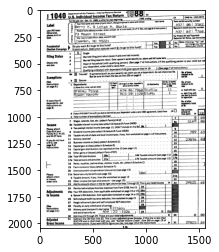

In [11]:
plt.imshow(aligned)

In [12]:
box1 = df.iloc[0,1:5]

In [13]:
x0, y0, x1, y1 = box1.to_numpy()
x0, y0

(250, 118)

In [14]:
def getXyCord(box):
    x0, y0, x1, y1 = box
    return x0, y0, x0 + x1, y0 + y1

In [15]:
x0, y0, x1, y1 = getXyCord(box1.to_numpy())

# draw.line((0, 0) + im.size, fill=128)
# cv2.rectangle(scaled_image, (x0, y0), (x1, y1), (0, 0, 255), 5)

In [16]:
img = Image.open(str(CONFIG.data / "imgs" / "aligned_test_img.png"))
img1 = ImageDraw.Draw(img)
img1.rectangle([(x0, y0), (x1, y1)], fill=128)
img.show()

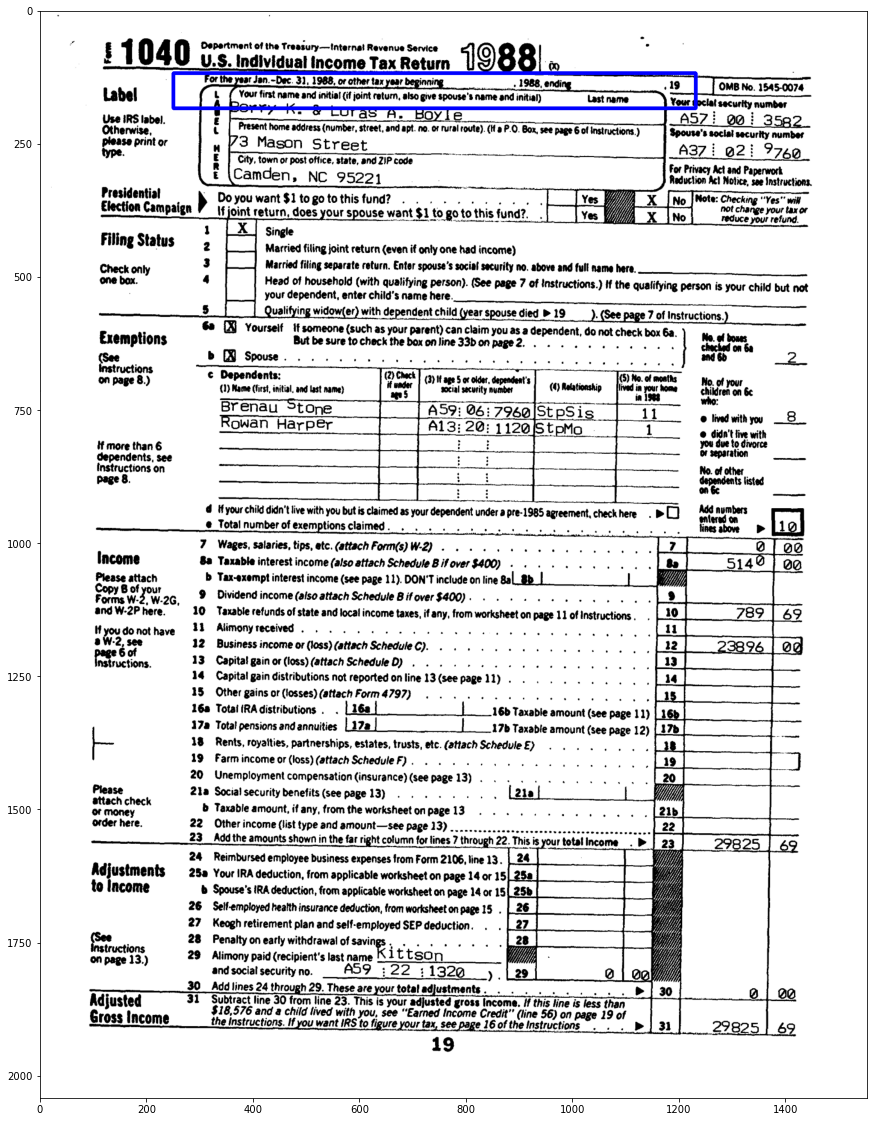

In [53]:
plt.figure(figsize=(15,20))
plt.imshow(scaled_image)

In [18]:
x, y, w, h = box1.to_numpy()

In [19]:
roi = np.array(aligned)[y:y+h,x:x+w]

In [20]:
import cv2
rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

In [21]:
text = pytesseract.image_to_string(rgb)

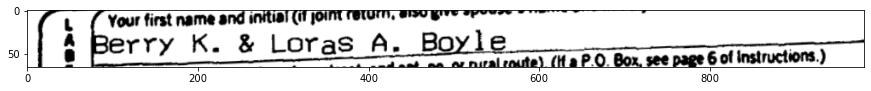

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.imshow(roi)

In [23]:
print(text)

‘Your first name and initial (1! JOIN Sek, ee

erry K. & Loras A. Bo

ome mia eeuite)

 
   

 

7THaP © Box. see page 6 of instructions.)



In [24]:
for line in text.split("\n"):
    

['‘Your first name and initial (1! JOIN Sek, ee',
 '',
 'erry K. & Loras A. Bo',
 '',
 'ome mia eeuite)',
 '',
 ' ',
 '   ',
 '',
 ' ',
 '',
 '7THaP © Box. see page 6 of instructions.)',
 '\x0c']